In [1]:
import tensorflow as tf
import numpy as np
import pickle


In [4]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_7_3.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)

x_train = input_data[:453600, :]
#x_test = input_data[971320:976320, :]


(453600, 24)


In [5]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_7_3.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:453600, :]
#y_test = output_data[971320:976320, :]
print(output_data.shape)

(453600, 12)


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 15, verbose = 2)#, validation_data = (x_test, y_test))


Train on 453600 samples
Epoch 1/15
453600/453600 - 6s - loss: 0.1814 - accuracy: 0.9169
Epoch 2/15
453600/453600 - 6s - loss: 0.0936 - accuracy: 0.9583
Epoch 3/15
453600/453600 - 6s - loss: 0.0569 - accuracy: 0.9765
Epoch 4/15
453600/453600 - 6s - loss: 0.0403 - accuracy: 0.9840
Epoch 5/15
453600/453600 - 6s - loss: 0.0302 - accuracy: 0.9883
Epoch 6/15
453600/453600 - 7s - loss: 0.0234 - accuracy: 0.9911
Epoch 7/15
453600/453600 - 7s - loss: 0.0185 - accuracy: 0.9931
Epoch 8/15
453600/453600 - 7s - loss: 0.0150 - accuracy: 0.9944
Epoch 9/15
453600/453600 - 7s - loss: 0.0123 - accuracy: 0.9954
Epoch 10/15
453600/453600 - 7s - loss: 0.0107 - accuracy: 0.9961
Epoch 11/15
453600/453600 - 7s - loss: 0.0094 - accuracy: 0.9966
Epoch 12/15
453600/453600 - 7s - loss: 0.0081 - accuracy: 0.9971
Epoch 13/15
453600/453600 - 7s - loss: 0.0074 - accuracy: 0.9973
Epoch 14/15
453600/453600 - 7s - loss: 0.0069 - accuracy: 0.9975
Epoch 15/15
453600/453600 - 7s - loss: 0.0059 - accuracy: 0.9979


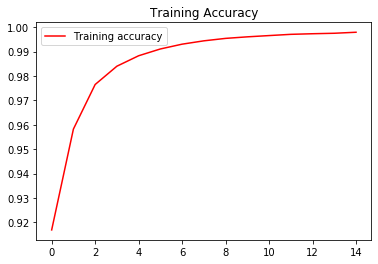

In [9]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
#val_acc = history.history['val_accuracy']
#val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
#plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
#plt.title('Training and Validating Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [10]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_7_3_model.h5')